# Relationship between $\delta$ and $\lambda$ through saddle point approximation

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import scipy
from scipy.stats import norm, multivariate_normal
import seaborn

from densitysplit import DensitySplit
from densitysplit.ldt_model import LDT, setup_logging

# to automatically reload imported modules when executing cell
%load_ext autoreload
%autoreload 2

setup_logging()
    
plt.style.use(os.path.join(os.path.abspath(''), 'densitysplit.mplstyle'))
plt.rcParams["figure.autolayout"] = False

plots_dir = '/feynman/home/dphp/mp270220/plots/density'

/feynman/work/dphp/adematti/cosmodesiconda/20240626-1.0.0/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
z = 0.5
smoothing_radius = 10
sigma = 0.4
nbar = 0.0005

In [3]:
ldtmodel = LDT(redshift=z, smoothing_scale=smoothing_radius, smoothing_kernel=1, nbar=nbar)
ldtmodel.interpolate_sigma()
ldtmodel.compute_ldt(sigma)

[000000.04]  11-18 11:27  LDT                          INFO     Initializing LDT
[000000.06]  11-18 11:27  LDT                          INFO     Initializing theoretical 1D power spectrum
[000002.51]  11-18 11:27  LDT                          INFO     Interpolating sigma for 70 R log-spaced values between -1.535056728662697 and 5.364943271337308


In [4]:
dpsi = np.gradient(ldtmodel.psi, ldtmodel.yvals, edge_order=2)

In [5]:
np.min(dpsi)

-567.5482071262003

In [6]:
np.max(dpsi)

0.3388899321979828

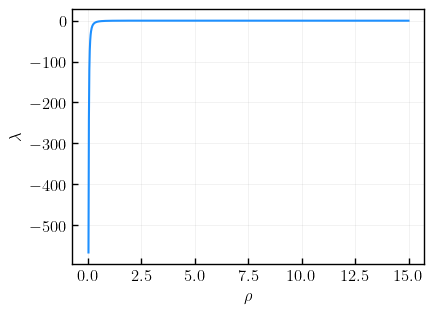

In [7]:
plt.figure(figsize=(4, 3))
plt.plot(ldtmodel.yvals, dpsi)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\lambda$')
plt.show()

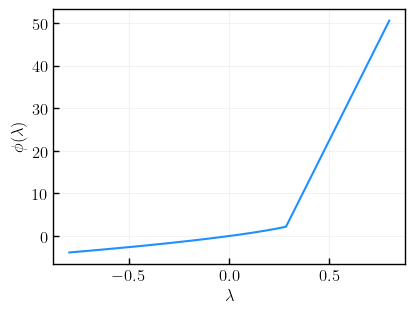

In [8]:
plt.figure(figsize=(4, 3))
plt.plot(ldtmodel.ldavals, ldtmodel.cgf)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\phi(\lambda)$')
plt.show()

In [8]:
def get_lambda_range(delta_range=np.arange(0.01, 5, 0.01)):
    nu = 21/13
    Tau = lambda y: nu*(1 - (1/y)**(1/nu))
    tau = nu*(1 - (1/yvals)**(1/nu))
    psi = (1 / 2) * tau**2 / ldtmodel.sigma_interp(delta_range**(1 / 3)*ldtmodel.smoothing_scale)**2 * ldtmodel.sigma_interp(ldtmodel.smoothing_scale)**2
    dpsi = np.gradient(psi, delta_range, edge_order=2)

In [9]:
sigma_test = 0.77

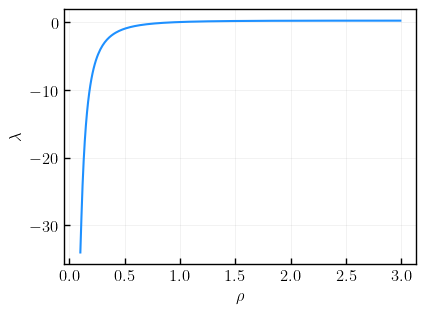

In [10]:
yvals = np.arange(0.1, 3, 0.01)
nu = 21/13
Tau = lambda y: nu*(1 - (1/y)**(1/nu))
tau = nu*(1 - (1/yvals)**(1/nu))
psi = (1 / 2) * tau**2 / ldtmodel.sigma_interp(yvals**(1 / 3)*ldtmodel.smoothing_scale)**2 * ldtmodel.sigma_interp(ldtmodel.smoothing_scale)**2
dpsi = np.gradient(psi, yvals, edge_order=2)

plt.figure(figsize=(4, 3))
plt.plot(yvals, sigma_test**2 * dpsi)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\lambda$')
plt.show()

In [11]:
np.max(dpsi)

0.33888993219797214